In [24]:
import torch
from torchvision import datasets, transforms, models

import torch.nn as nn
import torch.optim as optim

# Define transformations for the training and validation sets
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/workspace/pattern/main/data/Jute_Pest_Dataset'
image_datasets = {x: datasets.ImageFolder(root=f"{data_dir}/{x}", transform=data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=32, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load the pretrained AlexNet model
model = models.alexnet(pretrained=True)

# Modify the classifier to match the number of classes
num_ftrs = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_ftrs, 17)

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Training the model
num_epochs = 20

# for epoch in range(num_epochs):
#     print(f'Epoch {epoch}/{num_epochs - 1}')
#     print('-' * 10)

#     for phase in ['train', 'val']:
#         if phase == 'train':
#             model.train()
#         else:
#             model.eval()

#         running_loss = 0.0
#         running_corrects = 0

#         for inputs, labels in dataloaders[phase]:
#             inputs = inputs.to(device)
#             labels = labels.to(device)

#             optimizer.zero_grad()

#             with torch.set_grad_enabled(phase == 'train'):
#                 outputs = model(inputs)
#                 _, preds = torch.max(outputs, 1)
#                 loss = criterion(outputs, labels)

#                 if phase == 'train':
#                     loss.backward()
#                     optimizer.step()

#             running_loss += loss.item() * inputs.size(0)
#             running_corrects += torch.sum(preds == labels.data)

#         if phase == 'train':
#             scheduler.step()

#         epoch_loss = running_loss / dataset_sizes[phase]
#         epoch_acc = running_corrects.double() / dataset_sizes[phase]

#         print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

#     print()

# print('Training complete')

In [25]:
!pip3 install matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip


Epoch 0/19
----------
train Loss: 0.9383 Acc: 0.7148
val Loss: 0.7448 Acc: 0.7942

Epoch 1/19
----------
train Loss: 0.4627 Acc: 0.8537
val Loss: 0.6820 Acc: 0.8354

Epoch 2/19
----------
train Loss: 0.3745 Acc: 0.8856
val Loss: 0.7434 Acc: 0.8208

Epoch 3/19
----------
train Loss: 0.2994 Acc: 0.9066
val Loss: 0.7175 Acc: 0.8499

Epoch 4/19
----------
train Loss: 0.2745 Acc: 0.9126
val Loss: 0.6428 Acc: 0.8620

Epoch 5/19
----------
train Loss: 0.2478 Acc: 0.9213
val Loss: 0.7083 Acc: 0.8620

Epoch 6/19
----------
train Loss: 0.2411 Acc: 0.9257
val Loss: 0.6708 Acc: 0.8596

Epoch 7/19
----------
train Loss: 0.1820 Acc: 0.9427
val Loss: 0.6287 Acc: 0.8692

Epoch 8/19
----------
train Loss: 0.1633 Acc: 0.9517
val Loss: 0.6346 Acc: 0.8765

Epoch 9/19
----------
train Loss: 0.1517 Acc: 0.9542
val Loss: 0.6446 Acc: 0.8741

Epoch 10/19
----------
train Loss: 0.1507 Acc: 0.9542
val Loss: 0.6521 Acc: 0.8717

Epoch 11/19
----------
train Loss: 0.1401 Acc: 0.9561
val Loss: 0.6491 Acc: 0.8741

Ep

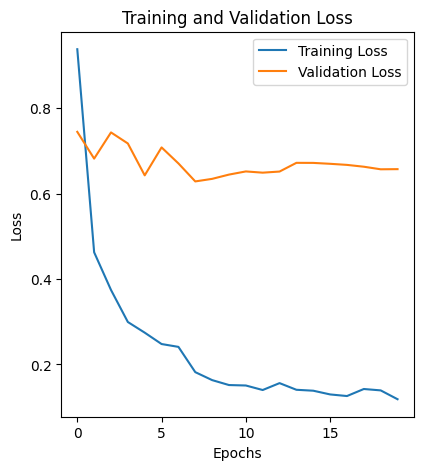

In [26]:
import matplotlib.pyplot as plt

# Initialize lists to store loss and accuracy values
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training the model
num_epochs = 20

for epoch in range(num_epochs):
    print(f'Epoch {epoch}/{num_epochs - 1}')
    print('-' * 10)

    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        if phase == 'train':
            scheduler.step()

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        if phase == 'train':
            train_losses.append(epoch_loss)
            train_accuracies.append(epoch_acc)
        else:
            val_losses.append(epoch_loss)
            val_accuracies.append(epoch_acc)

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    print()

print('Training complete')

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

Text(0.5, 1.0, 'Training and Validation Accuracy')

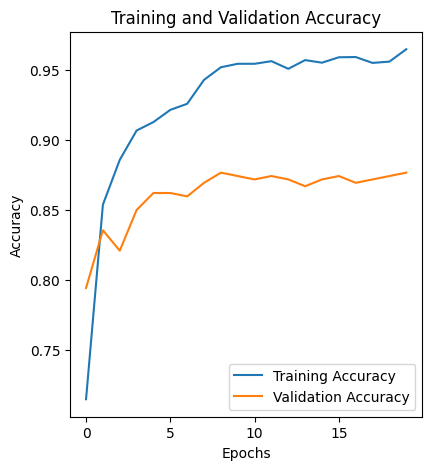

In [27]:
# Convert tensors to CPU before converting to numpy for plotting
train_accuracies_cpu = [acc.cpu().numpy() for acc in train_accuracies]
val_accuracies_cpu = [acc.cpu().numpy() for acc in val_accuracies]

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_accuracies_cpu, label='Training Accuracy')
plt.plot(range(num_epochs), val_accuracies_cpu, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')


In [28]:
# Load the test dataset
test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_dataset = datasets.ImageFolder(root=f"{data_dir}/test", transform=test_transforms)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)
test_dataset_size = len(test_dataset)

# Evaluate the model on the test dataset
model.eval()
running_corrects = 0

with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)

test_acc = running_corrects.double() / test_dataset_size
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.9736


In [16]:
# Clear all variables
for name in dir():
    if not name.startswith('_'):
        del globals()[name]